In [1]:
using StatsBase, Plots, LinearAlgebra, BenchmarkTools

In [2]:
include("Geometric_structures.jl")

is_vertical (generic function with 2 methods)

In [3]:
include("Particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

In [4]:
D1 = Hard_Disk(1.,[3,1.],[2.,2],5.,1)

LoadError: MethodError: no method matching Hard_Disk(::Float64, ::Vector{Float64}, ::Vector{Float64}, ::Float64, ::Int64)
[0mClosest candidates are:
[0m  Hard_Disk(::T, [91m::T[39m, ::Vector{T}, [91m::Vector{T}[39m, ::Int64) where T<:Real at ~/Downloads/Particle_disk_dynamics.jl:6

In [5]:
D2 = Hard_Disk(1,[3,1],[2,2],5,1)

LoadError: MethodError: no method matching Hard_Disk(::Int64, ::Vector{Int64}, ::Vector{Int64}, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  Hard_Disk(::T, [91m::T[39m, ::Vector{T}, [91m::Vector{T}[39m, ::Int64) where T<:Real at ~/Downloads/Particle_disk_dynamics.jl:6

In [6]:
@time D1

LoadError: UndefVarError: D1 not defined

In [7]:
@btime D1

LoadError: UndefVarError: D1 not defined

In [8]:
P1 = Particle(2.,[2.,3],[2.,2],[0.,1],[1.,1],3)

Particle{Float64}(2.0, [2.0, 3.0], [2.0, 2.0], [0.0, 1.0], [1.0, 1.0], 3)

In [9]:
@time P1

  0.000001 seconds


Particle{Float64}(2.0, [2.0, 3.0], [2.0, 2.0], [0.0, 1.0], [1.0, 1.0], 3)

In [10]:
@btime P1

  0.916 ns (0 allocations: 0 bytes)


Particle{Float64}(2.0, [2.0, 3.0], [2.0, 2.0], [0.0, 1.0], [1.0, 1.0], 3)

In [11]:
A = Segment([1.,2.],[1.,3],2.)

Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0)

In [12]:
B = Segment([1,2.],[1.,2],4.)

Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)

In [13]:
P1 = Polygon([[1.,2],[1,4.],[2.,4]],[A,B],5.,6.)

Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0)

In [14]:
R1 = Rhomboid([2.,2],[[3,2.],[2,4.],[5.,4]],[A,B],[2.,3])

Rhomboid{Float64}([2.0, 2.0], [[3.0, 2.0], [2.0, 4.0], [5.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [2.0, 3.0])

In [15]:
R = Rhomboid([1.,5],[[1,2.],[1,4.],[2.,4]],[A,B],[2.,3])

Rhomboid{Float64}([1.0, 5.0], [[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [2.0, 3.0])

In [16]:
mesh1 = Mesh([62,34.],[10.,24],[R,R1],[[12,23.],[12,12.]],P1,true)

LoadError: MethodError: no method matching Mesh(::Vector{Float64}, ::Vector{Float64}, ::Vector{Rhomboid{Float64}}, ::Vector{Vector{Float64}}, ::Polygon{Float64}, ::Bool)
[0mClosest candidates are:
[0m  Mesh(::Vector{T1}, ::Vector{T2}, ::Union{Array{Polygon{T2}, 1}, Array{Rhomboid{T2}, 1}}, ::Array{Vector{T2}, 1}, [91m::Mesh_Frontier{T2}[39m, ::Bool) where {T1<:Real, T2<:Real} at ~/Downloads/Geometric_structures.jl:57

In [17]:
rhomboid_per_dims = [8, 3]
rhomboid_diagonal = [1, 1.5]
rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])
r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = true)
r_mesh_nofrontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = false)

Mesh{Int64, Float64}([8, 3], [1.0, 1.5], Rhomboid{Float64}[Rhomboid{Float64}([1.0, 1.5], [[-7.5, -0.75], [-7.0, -1.5], [-6.5, -0.75], [-7.0, 0.0]], Segment{Float64}[Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, -1.5], 0.9013878188659973), Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973), Segment{Float64}([-6.5, -0.75], [-7.0, 0.0], 0.9013878188659973)], [-7.0, -0.75]), Rhomboid{Float64}([1.0, 1.5], [[-7.5, 0.75], [-7.0, 0.0], [-6.5, 0.75], [-7.0, 1.5]], Segment{Float64}[Segment{Float64}([-7.5, 0.75], [-7.0, 1.5], 0.9013878188659973), Segment{Float64}([-7.5, 0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.0, 0.0], [-6.5, 0.75], 0.9013878188659973), Segment{Float64}([-6.5, 0.75], [-7.0, 1.5], 0.9013878188659973)], [-7.0, 0.75]), Rhomboid{Float64}([1.0, 1.5], [[-7.0, 0.0], [-6.5, -0.75], [-6.0, 0.0], [-6.5, 0.75]], Segment{Float64}[Segment{Float64}([-7.0, 0.0], [-6.5, 0.75], 0.9013878188659973), Segm

In [18]:
MRU(5., [2,2.], [0,0.], :x) 

10.0

In [19]:
@time MRU(5., [2,2.], [0,0.], :x) 

  0.000018 seconds (8 allocations: 320 bytes)


10.0

In [20]:
@btime MRU(5., [2,2.], [0,0.], :x) 

  612.069 ns (8 allocations: 320 bytes)


10.0

In [21]:
x_disk([2,2.], 6., 2.)

5.840681146601463

In [22]:
@time x_disk([2,2.], 6., 2.)

  0.000013 seconds (4 allocations: 160 bytes)


5.840681146601463

In [23]:
@btime x_disk([2,2.], 6., 2.)

  249.328 ns (4 allocations: 160 bytes)


5.840681146601463

In [24]:
@time y_disk([2,2.], 6., 2.)

  0.000010 seconds (4 allocations: 160 bytes)


0.8823380072042966

In [25]:
@btime y_disk([2,2.], 6., 2.)

  249.447 ns (4 allocations: 160 bytes)


0.8823380072042966

In [26]:
@time x_particle([2,2.], [1,2.],4.)

  0.000007 seconds (8 allocations: 320 bytes)


6.0

In [27]:
@btime x_particle([2,2.], [1,2.],4.)

  498.711 ns (8 allocations: 320 bytes)


6.0

In [28]:
@time y_particle([2,2.], [1,2.],4.)

  0.000008 seconds (8 allocations: 320 bytes)


10.0

In [29]:
@btime y_particle([2,2.], [1,2.],4.)

  499.572 ns (8 allocations: 320 bytes)


10.0

In [30]:
@time projection([1,2.],[2,1.])

  0.013146 seconds (8 allocations: 320 bytes)


1.7888543819998317

In [31]:
@btime projection([1,2.],[2,1.])

  507.342 ns (8 allocations: 320 bytes)


1.7888543819998317

In [32]:
@time find_normal_vector([1,2.])

  0.033056 seconds (17 allocations: 1.531 KiB)


2-element Vector{Float64}:
 -0.8944271909999157
  0.4472135954999581

In [33]:
@btime find_normal_vector([1,2.])

  1.246 μs (17 allocations: 1.53 KiB)


2-element Vector{Float64}:
 -0.8944271909999157
  0.4472135954999581

In [34]:
@time find_tangential_vector([1,2.])

  0.000012 seconds (5 allocations: 240 bytes)


2-element Vector{Float64}:
 0.4472135954999579
 0.8944271909999159

In [35]:
@btime find_tangential_vector([1,2.])

  274.452 ns (5 allocations: 240 bytes)


2-element Vector{Float64}:
 0.4472135954999579
 0.8944271909999159

In [36]:
@time normal_velocity([2,2.])

  0.000026 seconds (32 allocations: 3.016 KiB)


2-element Vector{Float64}:
 -1.570092458683775e-16
  1.5700924586837752e-16

In [37]:
@btime normal_velocity([2,2.])

  2.292 μs (32 allocations: 3.02 KiB)


2-element Vector{Float64}:
 -1.570092458683775e-16
  1.5700924586837752e-16

In [38]:
@time tangential_velocity([2,2.])

  0.000013 seconds (7 allocations: 400 bytes)


2-element Vector{Float64}:
 2.0
 2.0

In [39]:
@btime tangential_velocity([2,2.])

  326.991 ns (7 allocations: 400 bytes)


2-element Vector{Float64}:
 2.0
 2.0

In [40]:
@time θ = Θ(4., 3., :z)

  0.000000 seconds


18.0

In [41]:
@btime Θ(4., 3., :z)

  0.001 ns (0 allocations: 0 bytes)


18.0

# MÁS FUNCIONES

In [42]:
p_mass = 1.
d_radius = 0.5
eta = η(Θ, p_mass, d_radius)

0.5

In [43]:
@time η(Θ, p_mass, d_radius)

  0.000012 seconds (3 allocations: 48 bytes)


0.5

In [44]:
@btime η(Θ, p_mass, d_radius)

  175.427 ns (3 allocations: 48 bytes)


0.5

In [45]:
disk_radius = 1.1
disk_position = [2., 0.]
disk_angular_velocity = tangential_velocity([-1.,0.]) ./ disk_radius
particle_position = [-2, 0.]
particle_velocity = [1., 0]
rhomboid_per_dims = [8, 3]
rhomboid_diagonal = [1, 1.5]
rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])
r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = true)

Mesh{Int64, Float64}([8, 3], [1.0, 1.5], Rhomboid{Float64}[Rhomboid{Float64}([1.0, 1.5], [[-8.0, 0.0], [-7.5, -0.75], [-7.0, 0.0], [-7.5, 0.75]], Segment{Float64}[Segment{Float64}([-8.0, 0.0], [-7.5, 0.75], 0.9013878188659973), Segment{Float64}([-8.0, 0.0], [-7.5, -0.75], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.0, 0.0], [-7.5, 0.75], 0.9013878188659973)], [-7.5, 0.0]), Rhomboid{Float64}([1.0, 1.5], [[-7.5, -0.75], [-7.0, -1.5], [-6.5, -0.75], [-7.0, 0.0]], Segment{Float64}[Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, -1.5], 0.9013878188659973), Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973), Segment{Float64}([-6.5, -0.75], [-7.0, 0.0], 0.9013878188659973)], [-7.0, -0.75]), Rhomboid{Float64}([1.0, 1.5], [[-7.0, -1.5], [-6.5, -2.25], [-6.0, -1.5], [-6.5, -0.75]], Segment{Float64}[Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973

In [46]:
rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])

Polygon{Float64}([[-7.5, -1.5], [-7.5, 1.5], [1.5, 1.5], [1.5, -1.5]], Segment{Float64}[Segment{Float64}([-7.5, -1.5], [1.5, -1.5], 9.0), Segment{Float64}([-7.5, -1.5], [-7.5, 1.5], 3.0), Segment{Float64}([-7.5, 1.5], [1.5, 1.5], 9.0), Segment{Float64}([1.5, 1.5], [1.5, -1.5], 3.0)], 24.0, 27.0)

In [47]:
@time rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])

  0.000010 seconds (29 allocations: 2.062 KiB)


Polygon{Float64}([[-7.5, -1.5], [-7.5, 1.5], [1.5, 1.5], [1.5, -1.5]], Segment{Float64}[Segment{Float64}([-7.5, -1.5], [1.5, -1.5], 9.0), Segment{Float64}([-7.5, -1.5], [-7.5, 1.5], 3.0), Segment{Float64}([-7.5, 1.5], [1.5, 1.5], 9.0), Segment{Float64}([1.5, 1.5], [1.5, -1.5], 3.0)], 24.0, 27.0)

In [48]:
@btime rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])

  531.968 ns (29 allocations: 2.06 KiB)


Polygon{Float64}([[-7.5, -1.5], [-7.5, 1.5], [1.5, 1.5], [1.5, -1.5]], Segment{Float64}[Segment{Float64}([-7.5, -1.5], [1.5, -1.5], 9.0), Segment{Float64}([-7.5, -1.5], [-7.5, 1.5], 3.0), Segment{Float64}([-7.5, 1.5], [1.5, 1.5], 9.0), Segment{Float64}([1.5, 1.5], [1.5, -1.5], 3.0)], 24.0, 27.0)

In [49]:
@time r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = true)

  0.000508 seconds (17.32 k allocations: 1.202 MiB)


Mesh{Int64, Float64}([8, 3], [1.0, 1.5], Rhomboid{Float64}[Rhomboid{Float64}([1.0, 1.5], [[-8.0, 0.0], [-7.5, -0.75], [-7.0, 0.0], [-7.5, 0.75]], Segment{Float64}[Segment{Float64}([-8.0, 0.0], [-7.5, 0.75], 0.9013878188659973), Segment{Float64}([-8.0, 0.0], [-7.5, -0.75], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.0, 0.0], [-7.5, 0.75], 0.9013878188659973)], [-7.5, 0.0]), Rhomboid{Float64}([1.0, 1.5], [[-7.5, -0.75], [-7.0, -1.5], [-6.5, -0.75], [-7.0, 0.0]], Segment{Float64}[Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, -1.5], 0.9013878188659973), Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973), Segment{Float64}([-6.5, -0.75], [-7.0, 0.0], 0.9013878188659973)], [-7.0, -0.75]), Rhomboid{Float64}([1.0, 1.5], [[-7.0, -1.5], [-6.5, -2.25], [-6.0, -1.5], [-6.5, -0.75]], Segment{Float64}[Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973

In [50]:
@btime r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = true)

  419.250 μs (17325 allocations: 1.20 MiB)


Mesh{Int64, Float64}([8, 3], [1.0, 1.5], Rhomboid{Float64}[Rhomboid{Float64}([1.0, 1.5], [[-8.0, 0.0], [-7.5, -0.75], [-7.0, 0.0], [-7.5, 0.75]], Segment{Float64}[Segment{Float64}([-8.0, 0.0], [-7.5, 0.75], 0.9013878188659973), Segment{Float64}([-8.0, 0.0], [-7.5, -0.75], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.0, 0.0], [-7.5, 0.75], 0.9013878188659973)], [-7.5, 0.0]), Rhomboid{Float64}([1.0, 1.5], [[-7.5, -0.75], [-7.0, -1.5], [-6.5, -0.75], [-7.0, 0.0]], Segment{Float64}[Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, -1.5], 0.9013878188659973), Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973), Segment{Float64}([-6.5, -0.75], [-7.0, 0.0], 0.9013878188659973)], [-7.0, -0.75]), Rhomboid{Float64}([1.0, 1.5], [[-7.0, -1.5], [-6.5, -2.25], [-6.0, -1.5], [-6.5, -0.75]], Segment{Float64}[Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973

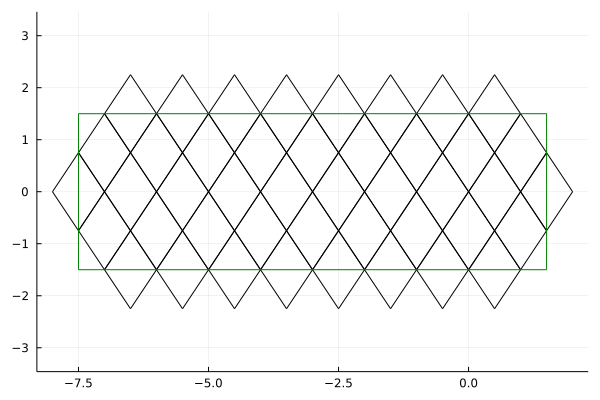

In [51]:
plot(r_mesh_frontier)

  0.017420 seconds (242.64 k allocations: 10.390 MiB)


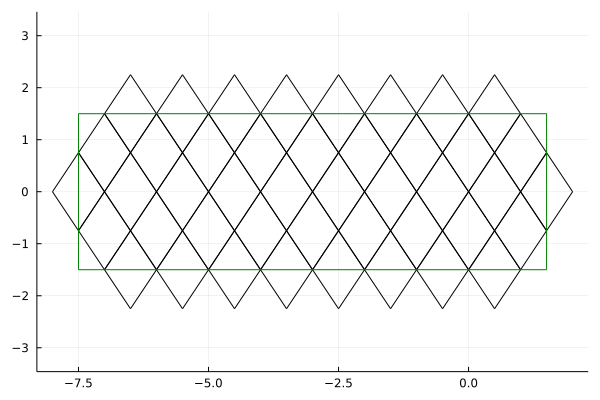

In [52]:
@time plot(r_mesh_frontier)

  16.475 ms (242637 allocations: 10.39 MiB)


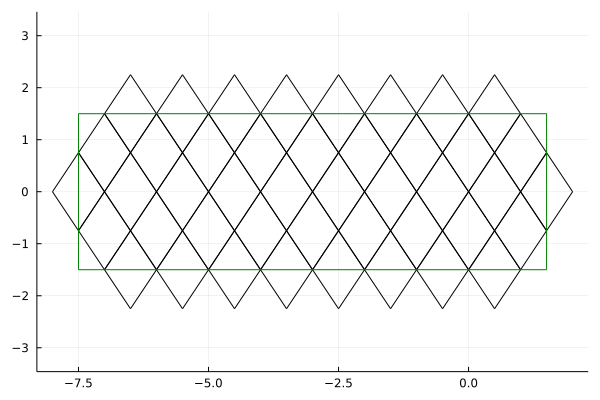

In [53]:
@btime plot(r_mesh_frontier)

  0.076073 seconds (745.33 k allocations: 36.145 MiB, 7.98% gc time, 74.68% compilation time)


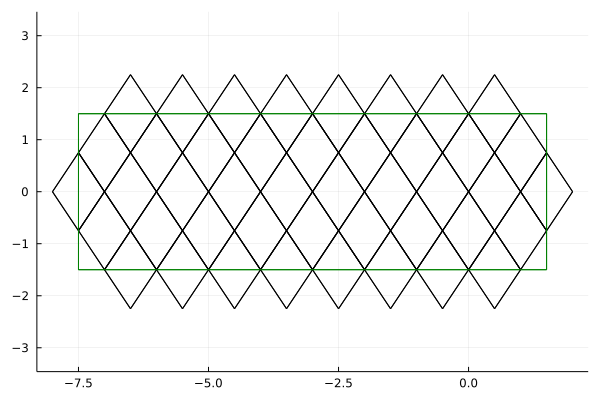

In [54]:
@time plot!(r_mesh_frontier)

In [55]:
@btime plot!(r_mesh_frontier)

  269.891 ms (1830610 allocations: 58.81 MiB)


In [56]:
plot!(r_mesh_frontier)

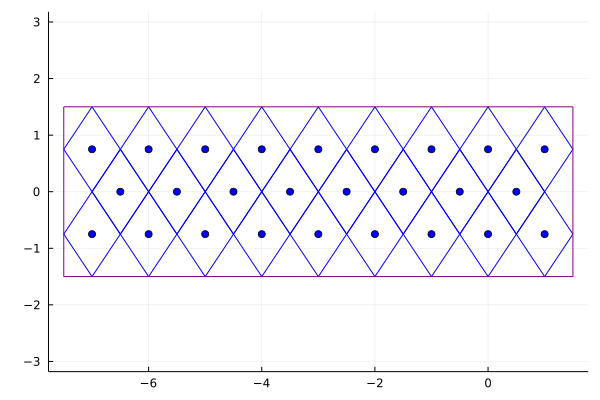

In [57]:
plot(r_mesh_nofrontier, plot_cell_center = true, color_cell = :blue, color_mesh_shape = :purple)

  0.010451 seconds (143.27 k allocations: 6.186 MiB)


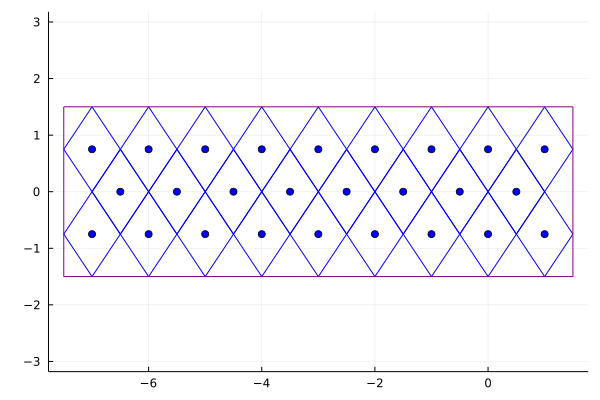

In [58]:
@time plot(r_mesh_nofrontier, plot_cell_center = true, color_cell = :blue, color_mesh_shape = :purple)

  9.434 ms (143272 allocations: 6.19 MiB)


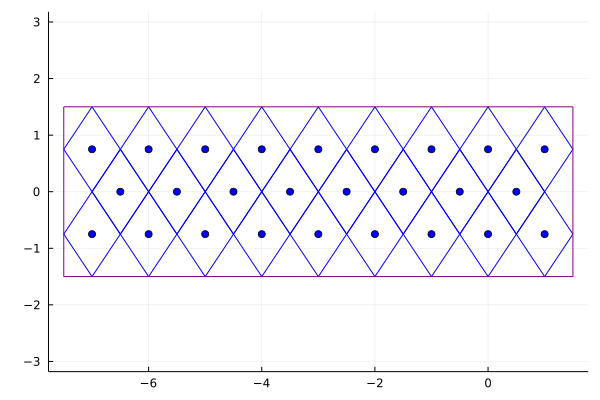

In [59]:
@btime plot(r_mesh_nofrontier, plot_cell_center = true, color_cell = :blue, color_mesh_shape = :purple)

In [60]:
disk_radius = 1.1
disk_position = [2., 0.]
disk_angular_velocity = tangential_velocity([-1.,0.]) ./ disk_radius
particle_position = [-2, 0.]
particle_velocity = [1., 0]
disk1 = hard_disk(1., disk_radius, disk_position, disk_angular_velocity, r_mesh_frontier)
particle1 = particle(1., particle_position, particle_velocity, r_mesh_frontier)
##find_cell(disk_position, r_mesh_frontier)
particle_disk_collision_dynamics(disk1, particle1)

LoadError: UndefVarError: particle_disk_collision_dynamics not defined

In [61]:
find_cell(disk_position, r_mesh_frontier)

44

In [63]:
disk_radius = 1.1
disk_position = [2., 0.]
disk_angular_velocity = tangential_velocity([-1.,0.]) ./ disk_radius
particle_position = [-2, 0.]
particle_velocity = [1., 0]
rhomboid_per_dims = [8, 3]
rhomboid_diagonal = [1, 1.5]
rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])
r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = true)

Mesh{Int64, Float64}([8, 3], [1.0, 1.5], Rhomboid{Float64}[Rhomboid{Float64}([1.0, 1.5], [[-8.0, 0.0], [-7.5, -0.75], [-7.0, 0.0], [-7.5, 0.75]], Segment{Float64}[Segment{Float64}([-8.0, 0.0], [-7.5, 0.75], 0.9013878188659973), Segment{Float64}([-8.0, 0.0], [-7.5, -0.75], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.0, 0.0], [-7.5, 0.75], 0.9013878188659973)], [-7.5, 0.0]), Rhomboid{Float64}([1.0, 1.5], [[-7.5, -0.75], [-7.0, -1.5], [-6.5, -0.75], [-7.0, 0.0]], Segment{Float64}[Segment{Float64}([-7.5, -0.75], [-7.0, 0.0], 0.9013878188659973), Segment{Float64}([-7.5, -0.75], [-7.0, -1.5], 0.9013878188659973), Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973), Segment{Float64}([-6.5, -0.75], [-7.0, 0.0], 0.9013878188659973)], [-7.0, -0.75]), Rhomboid{Float64}([1.0, 1.5], [[-7.0, -1.5], [-6.5, -2.25], [-6.0, -1.5], [-6.5, -0.75]], Segment{Float64}[Segment{Float64}([-7.0, -1.5], [-6.5, -0.75], 0.9013878188659973

In [64]:
disk_radius = 1.1
disk_position = [2., 0.]
disk_angular_velocity = tangential_velocity([-1.,0.]) ./ disk_radius
particle_position = [-2, 0.]
particle_velocity = [1., 0]
disk1 = hard_disk(1., disk_radius, disk_position, disk_angular_velocity, r_mesh_frontier)

Hard_Disk{Float64}(1.0, 1.1, [2.0, 0.0], [-0.9090909090909091, 0.0], 44)

In [65]:
@time disk1

  0.000000 seconds


Hard_Disk{Float64}(1.0, 1.1, [2.0, 0.0], [-0.9090909090909091, 0.0], 44)

In [66]:
@btime disk1

  0.875 ns (0 allocations: 0 bytes)


Hard_Disk{Float64}(1.0, 1.1, [2.0, 0.0], [-0.9090909090909091, 0.0], 44)

In [67]:
particle1 = particle(1., particle_position, particle_velocity, r_mesh_frontier)

Particle{Float64}(1.0, [-2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], 25)

In [68]:
@time particle1

  0.000000 seconds


Particle{Float64}(1.0, [-2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], 25)

In [69]:
@btime particle1

  0.834 ns (0 allocations: 0 bytes)


Particle{Float64}(1.0, [-2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], 25)

In [70]:
find_cell(disk_position, r_mesh_frontier)

44

In [71]:
@time find_cell(disk_position, r_mesh_frontier)

  0.000181 seconds (7.79 k allocations: 573.125 KiB)


44

In [72]:
@btime find_cell(disk_position, r_mesh_frontier)

  165.417 μs (7795 allocations: 573.12 KiB)


44

In [73]:
A = Segment([1.,2.],[1.,3],2.)

Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0)

In [74]:
B = Segment([1,2.],[1.,2],4.)

Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)

In [75]:
P1 = Polygon([[1.,2],[1,4.],[2.,4]],[A,B],5.,6.)

Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0)

In [76]:
R = Rhomboid([1.,5],[[1,2.],[1,4.],[2.,4]],[A,B],[2.,3])

Rhomboid{Float64}([1.0, 5.0], [[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [2.0, 3.0])

In [77]:
R1 = Rhomboid([2.,2],[[3,2.],[2,4.],[5.,4]],[A,B],[2.,3])

Rhomboid{Float64}([2.0, 2.0], [[3.0, 2.0], [2.0, 4.0], [5.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [2.0, 3.0])

In [78]:
function select_time(t::Vector{T}) where T <: Real
    if t[1] < 0 && t[2] < 0
        return error("The system does not have a physical solution for the specified collision. The solutions obtained account for negative times.")
    
    elseif t[1] > 0 && t[2] > 0
        t_c = findmin(t)[1]
        return t_c
        
    elseif (t[1] < 0 || t[2] < 0) || (t[1] > 0 || t[2] > 0) # Para hacer este caso mas especifico podria agregarse una condicion adicional: & !(t[1] < 0 && t[2] < 0)
        index = findfirst(x -> x > 0, t)
        t_c = t[index]
        return t_c
   
    elseif t[1] == 0 && t[2] == 0
        return error("The collision occurred at the initial time.")
    
    else
        return error("This function only receives a two-dimensional vector.")
    end
end

select_time (generic function with 1 method)

In [79]:
@time select_time([1,9])

  0.000003 seconds (1 allocation: 80 bytes)


1

In [80]:
@btime select_time([1,9])

  19.015 ns (1 allocation: 80 bytes)


1

In [81]:
function particle_segment_intersection(particle::Particle{T}, segment::Segment{T}) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    t = [vector_segment_intersection(velocity, position, segment, s) for s in [:x, :y]]
    t_intersection = select_time(t)
end

particle_segment_intersection (generic function with 1 method)

In [82]:
s0 = segment([0, -1.], [0., 1.])
particle0 = particle(2., [0., 0.], [1., 0.], r_mesh_frontier)
particle_segment_intersection(particle0, s0)

0.5

In [83]:
@time particle_segment_intersection(particle0, s0)

  0.000013 seconds (3 allocations: 160 bytes)


0.5

In [84]:
@btime particle_segment_intersection(particle0, s0)

  288.603 ns (3 allocations: 160 bytes)


0.5

In [85]:
identify_segment_type(P1)

2-element Vector{Symbol}:
 :left_side
 :left_side

In [86]:
@time identify_segment_type(P1)

  0.000029 seconds (22 allocations: 1.016 KiB)


2-element Vector{Symbol}:
 :left_side
 :left_side

In [87]:
@btime identify_segment_type(P1)

  956.105 ns (22 allocations: 1.02 KiB)


2-element Vector{Symbol}:
 :left_side
 :left_side

In [88]:
polygon_on_frontier(R,P1)

false

In [89]:
@time polygon_on_frontier(R,P1)

  0.000015 seconds (3 allocations: 112 bytes)


false

In [90]:
@btime polygon_on_frontier(R,P1)

  125.653 ns (3 allocations: 112 bytes)


false

In [91]:
rhomboid1 = rhomboid([1., 1.], particle1.position, :vertical)

Rhomboid{Float64}([1.0, 1.0], [[-2.5, 0.0], [-2.0, -0.5], [-1.5, 0.0], [-2.0, 0.5]], Segment{Float64}[Segment{Float64}([-2.5, 0.0], [-2.0, 0.5], 0.7071067811865476), Segment{Float64}([-2.5, 0.0], [-2.0, -0.5], 0.7071067811865476), Segment{Float64}([-2.0, -0.5], [-1.5, 0.0], 0.7071067811865476), Segment{Float64}([-1.5, 0.0], [-2.0, 0.5], 0.7071067811865476)], [-2.0, 0.0])

In [92]:
particle_segment_intersection(particle1, rhomboid1.segments[4])

0.3333333333333333

In [93]:
@time particle_segment_intersection(particle1, rhomboid1.segments[4])

  0.000017 seconds (3 allocations: 160 bytes)


0.3333333333333333

In [94]:
@btime particle_segment_intersection(particle1, rhomboid1.segments[4])

  315.678 ns (3 allocations: 160 bytes)


0.3333333333333333

In [98]:
@time is_horizontal(A)

  0.002723 seconds (2.62 k allocations: 154.509 KiB, 99.22% compilation time)


false

In [99]:
@btime is_horizontal(A)

  8.341 ns (0 allocations: 0 bytes)


false

In [100]:
@btime is_vertical(A)

  8.842 ns (0 allocations: 0 bytes)


true

In [101]:
@time is_vertical(A)

  0.000002 seconds


true

In [102]:
A1 = PolygonalLine([[1.,2],[1,4.],[2.,4]],[A,B],5.)

PolygonalLine{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0)

In [103]:
A2 = PolygonalLine([[1.,2],[1.,3],[2.,8]],[A,B],7.)

PolygonalLine{Float64}([[1.0, 2.0], [1.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 7.0)

In [104]:
A3 = PolygonalLine([[3.,2],[1.,3],[5.,8]],[A,B],9.)

PolygonalLine{Float64}([[3.0, 2.0], [1.0, 3.0], [5.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 9.0)

In [105]:
A4 = PolygonalLine([[7.,8],[9.,3],[2.,8]],[A,B],7.)

PolygonalLine{Float64}([[7.0, 8.0], [9.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 7.0)

In [106]:
Mesh_Frontier(P1,[A,B],[[5.,2],[6.,2],[7.,9]],A1,A2,A3,A4,9.)

Mesh_Frontier{Float64}(Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0), Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [[5.0, 2.0], [6.0, 2.0], [7.0, 9.0]], PolygonalLine{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0), PolygonalLine{Float64}([[1.0, 2.0], [1.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 7.0), PolygonalLine{Float64}([[3.0, 2.0], [1.0, 3.0], [5.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 9.0), PolygonalLine{Float64}([[7.0, 8.0], [9.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0,

In [107]:
@time Mesh_Frontier(P1,[A,B],[[5.,2],[6.,2],[7.,9]],A1,A2,A3,A4,9.)

  0.000018 seconds (12 allocations: 656 bytes)


Mesh_Frontier{Float64}(Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0), Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [[5.0, 2.0], [6.0, 2.0], [7.0, 9.0]], PolygonalLine{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0), PolygonalLine{Float64}([[1.0, 2.0], [1.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 7.0), PolygonalLine{Float64}([[3.0, 2.0], [1.0, 3.0], [5.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 9.0), PolygonalLine{Float64}([[7.0, 8.0], [9.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0,

In [108]:
@btime Mesh_Frontier(P1,[A,B],[[5.,2],[6.,2],[7.,9]],A1,A2,A3,A4,9.)

  1.296 μs (12 allocations: 656 bytes)


Mesh_Frontier{Float64}(Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0), Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [[5.0, 2.0], [6.0, 2.0], [7.0, 9.0]], PolygonalLine{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0), PolygonalLine{Float64}([[1.0, 2.0], [1.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 7.0), PolygonalLine{Float64}([[3.0, 2.0], [1.0, 3.0], [5.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 9.0), PolygonalLine{Float64}([[7.0, 8.0], [9.0, 3.0], [2.0, 8.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0,

In [109]:
@btime mesh_frontier(P1)

  2.870 μs (108 allocations: 6.25 KiB)


Mesh_Frontier{Float64}(Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0), Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], PolygonalLine{Float64}([[0.0, 0.0]], Segment{Float64}[Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)], 0.0), PolygonalLine{Float64}([[1.0, 2.0], [1.0, 3.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 6.0), PolygonalLine{Float64}([[0.0, 0.0]], Segment{Float64}[Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)], 0.0), PolygonalLine{Float64}([[0.0, 0.0]], Segment{Float64}[Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)], 0.0), 5.0)

In [110]:
@time mesh_frontier(P1)

  0.000027 seconds (108 allocations: 6.250 KiB)


Mesh_Frontier{Float64}(Polygon{Float64}([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 5.0, 6.0), Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], [[1.0, 2.0], [1.0, 4.0], [2.0, 4.0]], PolygonalLine{Float64}([[0.0, 0.0]], Segment{Float64}[Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)], 0.0), PolygonalLine{Float64}([[1.0, 2.0], [1.0, 3.0]], Segment{Float64}[Segment{Float64}([1.0, 2.0], [1.0, 3.0], 2.0), Segment{Float64}([1.0, 2.0], [1.0, 2.0], 4.0)], 6.0), PolygonalLine{Float64}([[0.0, 0.0]], Segment{Float64}[Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)], 0.0), PolygonalLine{Float64}([[0.0, 0.0]], Segment{Float64}[Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)], 0.0), 5.0)